# Signal Analysis Demo
This notebook loads the synthetic CSV in `data/raw/dummy_signal.csv`, uses the `signal_analysis` package in `src/`, and plots the raw signal, a bandpass-filtered signal, and a spectrogram.

In [1]:
# Ensure `src/` is on sys.path so we can import the package when the notebook server's cwd is the repo root or the notebooks folder.
import sys
from pathlib import Path
repo_root = Path.cwd() if (Path.cwd() / 'src').exists() else Path.cwd().parent
src_path = str(repo_root / 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)
print('using src path:', src_path)
# Now import package
from signal_analysis.processing import bandpass_filter, compute_spectrogram
from signal_analysis.utils import load_csv

using src path: /Users/piotrsobecki/Documents/Projekty/Metrologia PR/signal_analysis_project/src


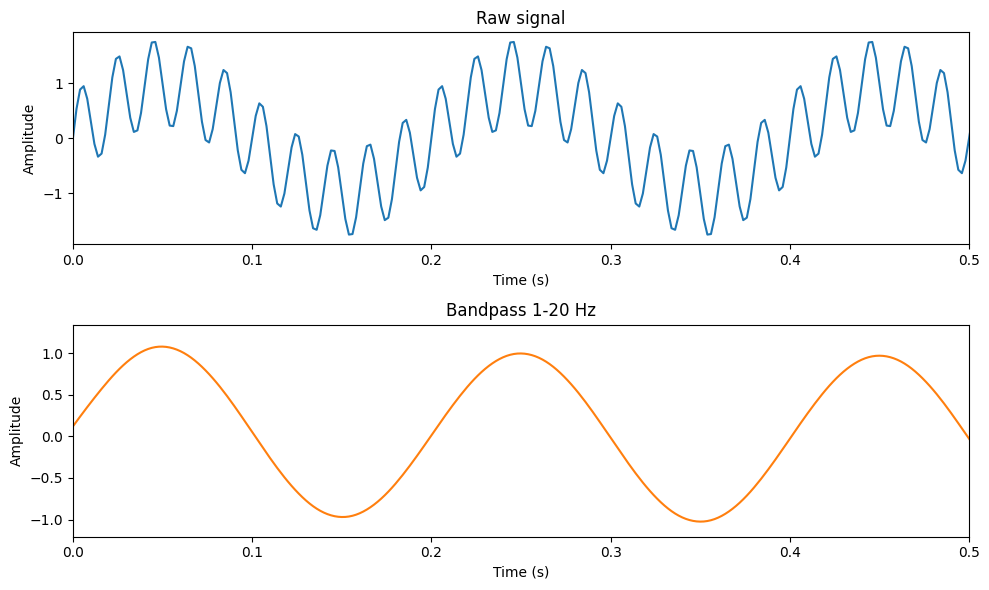

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# load CSV from data/raw
import pandas as pd
# set seaborn theme for nicer visuals
sns.set_theme(style="darkgrid")
csv_path = repo_root / 'data' / 'raw' / 'dummy_signal.csv'
df = pd.read_csv(csv_path)
x = df.iloc[:,0].to_numpy(dtype=float)
fs = 500.0  # sampling frequency used to generate the file
t = np.arange(len(x)) / fs
fig, ax = plt.subplots(2, 1, figsize=(10,6))
sns.lineplot(x=t, y=x, ax=ax[0], color='C0')
ax[0].set_title('Raw signal')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
# quick zoom for clarity
ax[0].set_xlim(0, 0.5)
# filtered signal
y = bandpass_filter(x, fs, 1.0, 20.0)
sns.lineplot(x=t, y=y, ax=ax[1], color='C1')
ax[1].set_title('Bandpass 1-20 Hz')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].set_xlim(0, 0.5)
plt.tight_layout()
plt.show()

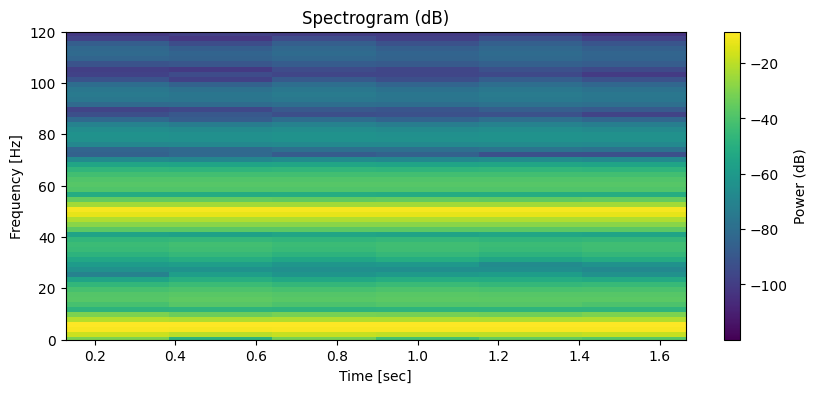

In [3]:
# Spectrogram
f, tt, Sxx = compute_spectrogram(x, fs=fs, nperseg=256, noverlap=128)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.pcolormesh(tt, f, 10 * np.log10(Sxx + 1e-12), shading='auto')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram (dB)')
plt.ylim(0, 120)
plt.colorbar(label='Power (dB)')
plt.show()